In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import exp
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
%matplotlib inline

In [2]:
#Spec = np.loadtxt('HE1108-2813_ASCII', unpack=False)
hdu = fits.open('Radio Loud Table.fits')
data_tot = hdu[1].data
data= data_tot[data_tot['L'] == 1]

print (len(data))

9863


In [3]:
def edd_ratio(log_L_OIII,vel_sigma_star):
    vel_sigma_ratio = (vel_sigma_star/200)**(4.02)
    const = 2.06*(10**(-43))
    L_OIII = 10**(log_L_OIII)
    edd_rat = (const*L_OIII)/vel_sigma_ratio
    return edd_rat

In [22]:
flux_OIII_5007 = data['OIII_5007_FLUX']
flux_OIII_5007_err = data['OIII_5007_FLUX_ERR']

SN_OIII_5007 = flux_OIII_5007/flux_OIII_5007_err

flux_Hb = data['H_BETA_FLUX']
flux_Hb_err = data['H_BETA_FLUX_ERR']

SN_Hb = flux_Hb/flux_Hb_err

flux_Ha = data['H_ALPHA_FLUX']
flux_Ha_err = data['H_ALPHA_FLUX_ERR']

SN_Ha = flux_Ha/flux_Ha_err

flux_NII_6584 = data['NII_6584_FLUX']
flux_NII_6584_err = data['NII_6584_FLUX_ERR']

SN_NII_6584 = flux_NII_6584/flux_NII_6584_err

flux_SII_6717 = data['SII_6717_FLUX']
flux_SII_6717_err = data['SII_6717_FLUX_ERR']

SN_SII_6717 = flux_SII_6717/flux_SII_6717_err

flux_SII_6731 = data['SII_6731_FLUX']
flux_SII_6731_err = data['SII_6731_FLUX_ERR']

SN_SII_6731 = flux_SII_6731/flux_SII_6731_err

z = data['z_1']
length = len(flux_OIII_5007)

vel_sigma_star = data['V_DISP']

ra = data['RA']
dec = data['DEC']

select_x = (dec > 1.99) & (dec<1.992)
OIII = flux_OIII_5007[select_x]
Hb = flux_Hb[select_x]
NII = flux_NII_6584[select_x]
Ha = flux_Ha[select_x]

OIII_Hb_selected = np.log10(OIII/Hb)
NII_Ha_selected = np.log10(NII/Ha)

print (NII_Ha_selected,OIII_Hb_selected)

[ 0.12327306] [ 0.28217769]


/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in true_divide


In [5]:
radio_flux = data['SNVSS']
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
D_L = cosmo.luminosity_distance(z)
dist = D_L.to(u.cm)
log_radio_power = np.log10(4*np.pi) + 2*np.log10(dist.value) + np.log10(radio_flux) - 33

In [6]:
log_lum_OIII = np.log10(4*np.pi) + 2*np.log10(dist.value) + np.log10(flux_OIII_5007) - 17
lum_OIII = 10**(log_lum_OIII)
lum_bol = 3500*lum_OIII
ratio_edd = edd_ratio(log_lum_OIII,vel_sigma_star)
log_p_jet = 0.75*log_radio_power + 26.02
select = (ratio_edd!=np.nan)
r_edd = ratio_edd[~np.isnan(ratio_edd)]
R_edd = (r_edd[~np.isinf(r_edd)])
R_eddington = R_edd[R_edd>0]
#R_eddington = R_eddington[R_eddington<0.01]
len(R_eddington)

/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


8729

In [7]:
quantity_1 = np.log10(flux_OIII_5007/flux_Hb) - np.log10(flux_NII_6584/flux_Ha)
quantity_2 = np.log10(flux_OIII_5007/flux_Hb) - np.log10((flux_SII_6717+flux_SII_6731)/flux_Ha)
SN = data['OIII_5007_FLUX']/data['OIII_5007_FLUX_ERR']

/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/anaconda3/lib/

In [9]:
for i in range (length):
    if quantity_1[i] > 0 and quantity_1[i] < 0.7 and quantity_2[i] > 0 and quantity_2[i] < 0.9 and SN_OIII_5007[i] > 3 and SN_Hb[i] > 3 and SN_Ha[i] > 3 and SN_NII_6584[i] > 3 and SN_SII_6717[i] > 3 and SN_SII_6731[i] >3:
        print ('%s,%s,%s'%(data['Plate'][i],data['MJD_1'][i],data['Fiber'][i]))
#       print ('%s,%s,%s,%s'%(data['Plate'][i],data['MJD_1'][i],data['Fiber'][i],SN[i]))
        popt = [data['Plate'][i],data['MJD_1'][i],data['Fiber'][i],SN[i],log_radio_power[i],ratio_edd[i],vel_sigma_star[i],ra[i],dec[i],log_p_jet[i],log_lum_OIII[i]]
        column_names={'PLATEID':0,'MJD':1,'FIBERID':2,'OIII_5007_SN':3,'log_L_radio':4,'edd ratio':5,'vel_sigma_stellar':6,'RA':7,'DEC':8,'log_P_jet':9,'log_L_OIII':10}
        columns=[]
        for key in column_names.keys():
            columns.append(fits.Column(name=key,format='E',array=[popt[column_names[key]]]))
            coldefs = fits.ColDefs(columns)
            hdu = fits.BinTableHDU.from_columns(coldefs)
            hdu.writeto('LERG/%s_%s_%s_LERG.fits'%(data['Plate'][i],data['MJD_1'][i],data['Fiber'][i]),overwrite=True)
    else:
        pass

266,51602,26
267,51608,34
267,51608,260
267,51608,297
268,51633,38
270,51909,125
271,51883,494
272,51941,437
274,51913,218
274,51913,430
275,51910,447
277,51908,168
278,51900,184
278,51900,254
281,51614,206
281,51614,616
283,51959,129
283,51959,420
292,51609,519
296,51665,24
298,51955,353
300,51666,250
301,51641,452
304,51609,319
304,51609,352
312,51689,3
312,51689,471
314,51641,222
326,52375,164
328,52282,63
328,52282,112
328,52282,477
329,52056,173
329,52056,455
330,52370,533
331,52368,283
333,52313,110
333,52313,244
335,52000,423
337,51997,501
339,51692,234
339,51692,240
339,51692,469
341,51690,184
341,51690,467
342,51691,1
342,51691,417
345,51690,557
346,51693,410
349,51699,169
351,51695,613
357,51813,70
372,52173,179
377,52145,497
380,51792,270
385,51783,487
386,51788,426
387,51791,521
389,51795,182
390,51816,8
391,51782,25
391,51782,529
393,51794,445
393,51794,524
396,51816,311
397,51794,111
400,51820,84
402,51793,87
404,51812,30
404,51812,73
406,51817,443
407,51820,90
407,51820,

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import curve_fit
from numpy import exp
from scipy import ndimage
from astropy.table import Table, hstack
import os
import glob
from astropy.table import Table, vstack, join
import pandas as pd

from shutil import copyfile

def script2(input_filename,output_filename):
    dir_name = 'LERG'   
    os.chdir(dir_name)
    infiles = sorted(glob.glob(input_filename)) # './*source.fits'
    tabledict = {}
  
    for i, file in enumerate(infiles):
        hdulist = fits.open(file)
        bintab = hdulist[1].data
        table = Table(bintab)
        name = table['OIII_5007_SN'][0]  
        tabledict[name] = table

    tab = vstack(list(tabledict.values()))
    df = tab.to_pandas()
    df = df.sort_values(by='OIII_5007_SN', ascending=True)
    dtab = Table.from_pandas(df)
    dtab.write(output_filename, format='fits', overwrite=True)
    
script2(input_filename='./*LERG.fits',output_filename='LERG_cord.fits')


In [7]:
hdu = fits.open('/home/u2/mainak/Downloads/LERG_cord.fits')
data = hdu[1].data

log_L_OIII = data['log_L_OIII']
log_P_jet = data['log_P_jet']
len(log_P_jet)

899

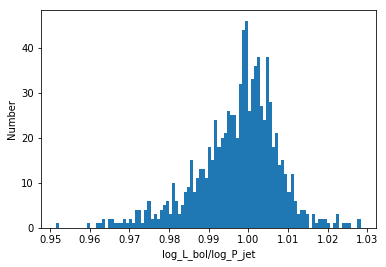

In [6]:
plt.hist((np.log10(3500)+log_L_OIII)/log_P_jet,bins=100)
plt.xlabel('log_L_bol/log_P_jet')
plt.ylabel('Number')

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import curve_fit
from numpy import exp
from scipy import ndimage
from astropy.table import Table, hstack
import os
import glob
from astropy.table import Table, vstack, join
import pandas as pd

from shutil import copyfile



def script2(input_filename,output_filename):
    dir_name = '/home/u2/mainak/Downloads/LERG/Big Table/Paper1'   
    os.chdir(dir_name)
    infiles = sorted(glob.glob(input_filename)) # './*source.fits'
    tabledict = {}
  
    for i, file in enumerate(infiles):
        hdulist = fits.open(file)
        bintab = hdulist[1].data
        table = Table(bintab)
        name = table['amp_OIII5007'][0]  
        tabledict[name] = table

    tab = vstack(list(tabledict.values()))
    df = tab.to_pandas()
    df = df.sort_values(by='amp_OIII5007', ascending=True)
    dtab = Table.from_pandas(df)
    dtab.write(output_filename, format='fits', overwrite=True)
    
script2(input_filename='./*_central_fit.fits',output_filename='LERG_model_par.fits')